<a href="https://colab.research.google.com/github/emmynuel/BeautifulSoup-Scrape-the-Wikipedia-list-of-top-1000-Universities-in-the-world-and-analyse/blob/main/Scraping_the_web_using_Beautiful_soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Scrape the Wikipedia list of top 1000 Universities in the world and analyse

## Table of Contents

1. Introduction
1. Web Scraping
1. Data Wrangling
1. Exploratory Data Analysis
1. Visualization and Conclusion


### Introduction

World Universities are ranked by several organizations. This is a comparative list of some rankings published during 2021-2023. Included are the universities which are ranked in the top 1000 by at least one of the following:

* QS World University Rankings: 2023
* Academic Ranking of World Universities (ARWU or Shanghai Ranking): 2021
* Times Higher Education World University Rankings (THE): 2022
* U.S. News & World Report (USNWR): 2022

In the course of this project, I aim to put into practise the act of web scrapping and story-telling through the EDA process to find out the three (3) countries that house the most universities in these ranking, Probably dig deep for more insight along the way. So let's enjoy the process.

In [ ]:
# Import the required libraries

import requests
import json
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

### Web Scrapping

Grap the page url and run request function

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_top_1000_universities_in_the_world'
# r_year = str(input('Enter the Ranking Year:'))
#full_url = url + r_year 

In [ ]:
 url 

'https://en.wikipedia.org/wiki/List_of_top_1000_universities_in_the_world'

In [ ]:
# The beautifulsoup package was used to scrape the content of the web-page

res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
df_table = soup.find_all('table')

Inspecting the page, the data needed is in the second table -  So the $find_all('table')$ value that the soup assign to the df_table still needs to be work on to select the exact table needed.


In [ ]:
df_table = df_table[1]
df_table

<table class="wikitable sortable" style="text-align:center;">
<tbody><tr>
<th>University
</th>
<th>Country
</th>
<th>THE
<p>2022<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</p>
</th>
<th>QS 2023<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
</th>
<th>ARWU 2021<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</th>
<td>USNWR 2022 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
</td>
<th>Average *
</th>
<th>Ranking based on the average
</th></tr>
<tr>
<td><a href="/wiki/Harvard_University" title="Harvard University">Harvard  University</a></td>
<td>United States</td>
<td>2</td>
<td>5</td>
<td>1
</td>
<td>1
</td>
<td>2.3
</td>
<td>1
</td></tr>
<tr>
<td><a href="/wiki/Massachusetts_Institute_of_Technology" title="Massachusetts Institute of Technology">Massachusetts  Institute of Technology</a> (MIT)</td>
<td>United  States</td>
<td>5</td>
<td>1</td>
<td>4
</td>
<td>2
</td>
<td

In [ ]:
# Select each table rows 

table_row = [row for row in df_table.find_all('tr')]
table_row

[<tr>
 <th>University
 </th>
 <th>Country
 </th>
 <th>THE
 <p>2022<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </p>
 </th>
 <th>QS 2023<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
 </th>
 <th>ARWU 2021<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
 </th>
 <td>USNWR 2022 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
 </td>
 <th>Average *
 </th>
 <th>Ranking based on the average
 </th></tr>,
 <tr>
 <td><a href="/wiki/Harvard_University" title="Harvard University">Harvard  University</a></td>
 <td>United States</td>
 <td>2</td>
 <td>5</td>
 <td>1
 </td>
 <td>1
 </td>
 <td>2.3
 </td>
 <td>1
 </td></tr>,
 <tr>
 <td><a href="/wiki/Massachusetts_Institute_of_Technology" title="Massachusetts Institute of Technology">Massachusetts  Institute of Technology</a> (MIT)</td>
 <td>United  States</td>
 <td>5</td>
 <td>1</td>
 <td>4
 </td>
 <td>2
 </td>
 <td>3.0
 </td>
 <td>2
 </td>

### Data Wrangling

At this stage :
* Data Conversion
* Data Cleaning

A for loop does the job by running through each rows and selecting each data according to html tag $<td>$ to assign to the empty list i created, this data was also cleaned from special symbols

In [ ]:
result = []
for row in table_row[1:]:
    rows = row.find_all('td')
    str_rows = str(rows)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_rows))
    result.append(clean2)
    
print(result)

['[Harvard  University, United States, 2, 5, 1\n, 1\n, 2.3\n, 1\n]', '[Massachusetts  Institute of Technology (MIT), United  States, 5, 1, 4\n, 2\n, 3.0\n, 2\n]', '[Stanford  University, United  States, 4, 3, 2\n, 3\n, 3.0\n, 3\n]', '[University of  Oxford, United  Kingdom, 1, 4, 7\n, 5\n, 4.3\n, 4\n]', '[University of  Cambridge, United  Kingdom, 5, 2, 3\n, 8\n, 4.5\n, 5\n]', '[California  Institute of Technology (Caltech), United  States, 2, 6, 9\n, 9\n, 6.5\n, 6\n]', '[University of  California, Berkeley (UCB), United  States, 8, 27, 5\n, 4\n, 11.0\n, 7\n]', '[University of  Chicago, United  States, 10, 10, 10\n, 15\n, 11.3\n, 8\n]', '[Princeton  University, United  States, 7, 16, 6\n, 16\n, 11.3\n, 9\n]', '[Columbia  University, United  States, 11, 22, 8\n, 6\n, 11.8\n, 10\n]', '[Yale  University, United  States, 9, 18, 11\n, 12\n, 12.5\n, 11\n]', '[University of  Pennsylvania, United  States, 13, 13, 15\n, 13\n, 13.5\n, 12\n]', '[University  College London (UCL), United  Kingdom, 

In [ ]:
#for wd in range(len(df_list)):
#    if wd > 0:
#        University = cells[0].text.strip()
#        Country = df_list[1].text.strip()
#        THE_2022 = df_list[2].text.strip()
#        QS_2023 = df_list[3].text.strip()
#        ARWU_2021 = df_list[4].text.strip()
#        USNWR_2022 = df_list[5].text.strip()
#        AVERAGE  = df_list[6].text.strip()
#        Ranking_based_on_the_average = df_list[7].text.strip()

In [ ]:
# Pass the append list to a dataframe

df_formed = pd.DataFrame(result)
df_formed

,0
0,"[Harvard University, United States, 2, 5, 1\n..."
1,"[Massachusetts Institute of Technology (MIT),..."
2,"[Stanford University, United States, 4, 3, 2..."
3,"[University of Oxford, United Kingdom, 1, 4,..."
4,"[University of Cambridge, United Kingdom, 5,..."
...,...
1185,"[University of Passau\n, Germany\n, 351-400\n,..."
1186,"[North China Electric Power University\n, Chin..."
1187,[Institut National Polytechnique de Toulouse\n...
1188,"[Wuhan University of Science and Technology\n,..."


### Data Cleaning cont..

The $\n$ next line html symbol was picked and its makes our data untidy. Looking at the dataframe created, there are all packed into one column, the $.split$ is used to expand them using comma

In [ ]:
df1_formed = df_formed[0].str.split(',', expand=True)
df1_formed[0] = df1_formed[0].str.strip('[')
df1_formed[7] = df1_formed[7].str.strip('\n]')
df1_formed[1] = df1_formed[1].str.strip('\n')
df1_formed[2] = df1_formed[2].str.strip('\n')
df1_formed[3] = df1_formed[3].str.strip('\n')
df1_formed[4] = df1_formed[4].str.strip('\n')
df1_formed[5] = df1_formed[5].str.strip('\n')
df1_formed[6] = df1_formed[6].str.strip('\n')
df1_formed.head()

,0,1,2,3,4,5,6,7,8,9
0,Harvard University,United States,2,5,1,1,2.3,1,None,None
1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2,3.0,2,None,None
2,Stanford University,United States,4,3,2,3,3.0,3,None,None
3,University of Oxford,United Kingdom,1,4,7,5,4.3,4,None,None
4,University of Cambridge,United Kingdom,5,2,3,8,4.5,5,None,None


In [ ]:
# Delete (drop) the last two unnecessary column

df1_formed = df1_formed.drop(columns = [8,9])
df1_formed

,0,1,2,3,4,5,6,7
0,Harvard University,United States,2,5,1,1,2.3,1
1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2,3.0,2
2,Stanford University,United States,4,3,2,3,3.0,3
3,University of Oxford,United Kingdom,1,4,7,5,4.3,4
4,University of Cambridge,United Kingdom,5,2,3,8,4.5,5
...,...,...,...,...,...,...,...,...
1185,University of Passau\n,Germany,351-400,N/A,,,,
1186,North China Electric Power University\n,China,,N/A,,,,
1187,Institut National Polytechnique de Toulouse\n,France,,N/A,,,,
1188,Wuhan University of Science and Technology\n,China,,N/A,,,,


Assign the columns name

In [ ]:
df1_formed.columns = ['University','Country','THE_2022','QS_2023','ARWU_2021','USNWR_2022','AVERAGE','Ranking_based_on_the_average']
df1_formed

,University,Country,THE_2022,QS_2023,ARWU_2021,USNWR_2022,AVERAGE,Ranking_based_on_the_average
0,Harvard University,United States,2,5,1,1,2.3,1
1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2,3.0,2
2,Stanford University,United States,4,3,2,3,3.0,3
3,University of Oxford,United Kingdom,1,4,7,5,4.3,4
4,University of Cambridge,United Kingdom,5,2,3,8,4.5,5
...,...,...,...,...,...,...,...,...
1185,University of Passau\n,Germany,351-400,N/A,,,,
1186,North China Electric Power University\n,China,,N/A,,,,
1187,Institut National Polytechnique de Toulouse\n,France,,N/A,,,,
1188,Wuhan University of Science and Technology\n,China,,N/A,,,,


In [ ]:
df1_formed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   University                    1190 non-null   object
 1   Country                       1190 non-null   object
 2   THE_2022                      1190 non-null   object
 3   QS_2023                       1190 non-null   object
 4   ARWU_2021                     1190 non-null   object
 5   USNWR_2022                    1190 non-null   object
 6   AVERAGE                       1190 non-null   object
 7   Ranking_based_on_the_average  1190 non-null   object
dtypes: object(8)
memory usage: 74.5+ KB


Looking at the dataframe information above, its says there are no empty(null) columns and all columns are string(object) which in reality are false. This happen due to the way i passed the entire data as str at the point of extraction, so we need to do some cleaning by removing the "" that exist on empty columns which count as values and convert the necessary columns to integer.

In [ ]:
# Work only with the cleaned data and convert to int

row_drop = df1_formed['Ranking_based_on_the_average'].isin ([" ", ' --', ' N/A'])
df_clean = df1_formed[~row_drop]
df_clean['Ranking_based_on_the_average'] = pd.to_numeric(df_clean['Ranking_based_on_the_average'])


<ipython-input-209-dd2782db1b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ranking_based_on_the_average'] = pd.to_numeric(df_clean['Ranking_based_on_the_average'])


In [ ]:
df_clean.head(10)

,University,Country,THE_2022,QS_2023,ARWU_2021,USNWR_2022,AVERAGE,Ranking_based_on_the_average
0,Harvard University,United States,2,5,1,1,2.3,1.0
1,Massachusetts Institute of Technology (MIT),United States,5,1,4,2,3.0,2.0
2,Stanford University,United States,4,3,2,3,3.0,3.0
3,University of Oxford,United Kingdom,1,4,7,5,4.3,4.0
4,University of Cambridge,United Kingdom,5,2,3,8,4.5,5.0
5,California Institute of Technology (Caltech),United States,2,6,9,9,6.5,6.0
6,University of California,Berkeley (UCB),United States,8,27,5,4,11.0
7,University of Chicago,United States,10,10,10,15,11.3,8.0
8,Princeton University,United States,7,16,6,16,11.3,9.0
9,Columbia University,United States,11,22,8,6,11.8,10.0


In [ ]:
df_clean.Country.unique()

array(['UNITEDSTATES', 'UNITEDKINGDOM', 'BERKELEY(UCB)', 'SWITZERLAND',
       'CHINA', 'CANADA', 'LOSANGELES(UCLA)', 'ANNARBOR', 'AUSTRALIA',
       'SANDIEGO(UCSD)', 'SINGAPORE', 'JAPAN', 'GERMANY', 'CHAPELHILL',
       'HONGKONG', 'FRANCE', 'DENMARK', 'BELGIUM', 'NETHERLANDS',
       'SOUTHKOREA', 'DAVIS', 'SANTABARBARA(UCSB)', 'NORWAY',
       'COLLEGEPARK', 'FINLAND', 'SWEDEN', 'IRVINE', 'NEWZEALAND',
       'SPAIN', 'IRELAND', 'AUSTRIA', 'RUSSIA', 'ISRAEL', 'ITALY',
       'BRAZIL', 'SAUDIARABIA', 'TAIWAN', 'UMASSMEDICALSCHOOL)',
       'KNOXVILLE', 'ARGENTINA', 'MEXICO', 'KAZAKHSTAN'], dtype=object)

In [ ]:
#Some countries are duplicated but recognise as unique because of their format

df_clean['Country'] = df_clean['Country'].str.upper()
df_clean['Country'] = df_clean['Country'].str.replace(' ','')

<ipython-input-201-7f807aa3ab07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = df_clean['Country'].str.upper()
<ipython-input-201-7f807aa3ab07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = df_clean['Country'].str.replace(' ','')


### Exploratory Data Analysis

I think i will be advancing my study soon, and am borthered on the following questions:
* Which Country have the best educational system considering their numbers in the ranking?
* Are there correlation between these top-ranked schools with high tuition fees?
* I want to consider the top 100 and top 200 ranked universities countries attendance?

In [ ]:
top_100 = df_clean.nlargest(100,'Ranking_based_on_the_average').groupby('Country')['Ranking_based_on_the_average'].count().sort_values( ascending = False)
top_100.head(10)

Country
UNITEDSTATES     16
GERMANY          11
UNITEDKINGDOM    10
CHINA             8
AUSTRALIA         7
JAPAN             6
ITALY             5
SOUTHKOREA        5
FRANCE            4
ISRAEL            4
Name: Ranking_based_on_the_average, dtype: int64

<AxesSubplot:title={'center':'Countries with the most university in the top 100'}, xlabel='Country'>

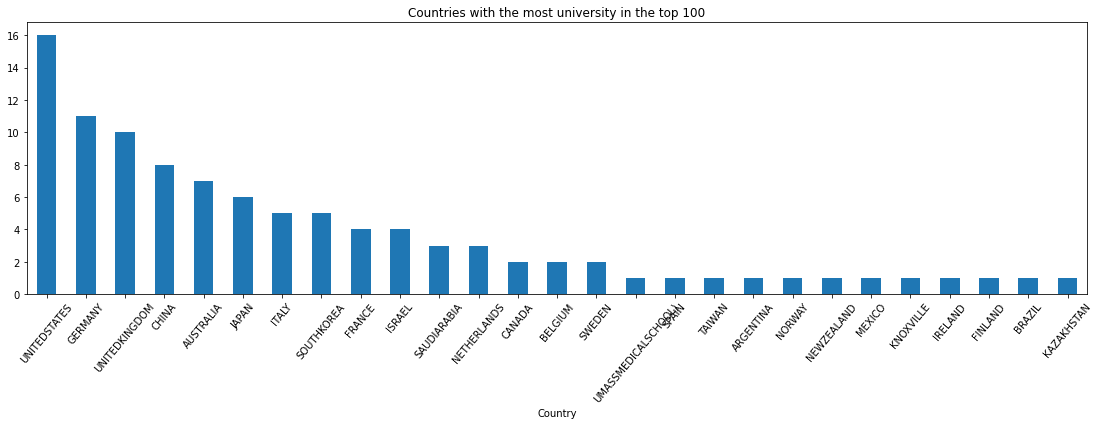

In [ ]:
top_100.plot(kind='bar', rot=50,figsize = (19,5), title= 'Countries with the most university in the top 100')

### Answer:

Its so glaring from our analysis that United State is the country with the most top-ranked universities while Germany top UK in top 100 but was leapfrogged by the United Kingdom in the top 200. China maintain their 4th position in both scenerio.

Netherland among other countries are dominating the top 200-below 100 categories, I think if this country can analyse her operations data and take more data driven decisions, they should pose more rapid growth in the coming years.

In [ ]:
top_200 = df_clean.nlargest(200,'Ranking_based_on_the_average').groupby('Country')['Ranking_based_on_the_average'].count().sort_values( ascending = False)
top_200.head(10)

Country
UNITEDSTATES     42
UNITEDKINGDOM    24
GERMANY          16
CHINA            14
NETHERLANDS      11
AUSTRALIA        10
SWEDEN            7
CANADA            7
JAPAN             7
FRANCE            6
Name: Ranking_based_on_the_average, dtype: int64

<AxesSubplot:title={'center':'Countries with the most university in the top 200'}, xlabel='Country'>

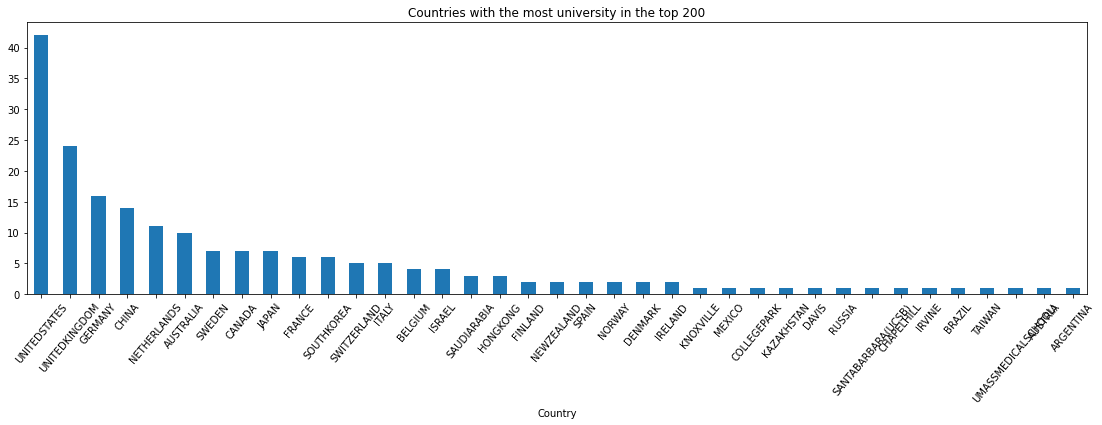

In [ ]:
top_200.plot(kind='bar', rot=50,figsize = (19,5), title= 'Countries with the most university in the top 200')

In [ ]:
#comp_df = df1_formed.nlargest(200,'QS_2023')

row_drop = df1_formed['QS_2023'].isin ([" ", ' --', ' N/A'])
comp_df = df1_formed[~row_drop]

comp_df['QS_2023'] = pd.to_numeric(comp_df['QS_2023'].iloc[0:200,])
comp_df['ARWU_2021'] = pd.to_numeric(comp_df['ARWU_2021'].iloc[0:150,])
comp_df['USNWR_2022'] = pd.to_numeric(comp_df['USNWR_2022'].iloc[0:150,])
comp_df.head(10)

<ipython-input-242-64db53602775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['QS_2023'] = pd.to_numeric(comp_df['QS_2023'].iloc[0:200,])
<ipython-input-242-64db53602775>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['ARWU_2021'] = pd.to_numeric(comp_df['ARWU_2021'].iloc[0:150,])
<ipython-input-242-64db53602775>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,University,Country,THE_2022,QS_2023,ARWU_2021,USNWR_2022,AVERAGE,Ranking_based_on_the_average
0,Harvard University,United States,2,5.0,1.0,1.0,2.3,1
1,Massachusetts Institute of Technology (MIT),United States,5,1.0,4.0,2.0,3.0,2
2,Stanford University,United States,4,3.0,2.0,3.0,3.0,3
3,University of Oxford,United Kingdom,1,4.0,7.0,5.0,4.3,4
4,University of Cambridge,United Kingdom,5,2.0,3.0,8.0,4.5,5
5,California Institute of Technology (Caltech),United States,2,6.0,9.0,9.0,6.5,6
6,University of California,Berkeley (UCB),United States,8.0,27.0,5.0,4,11.0
7,University of Chicago,United States,10,10.0,10.0,15.0,11.3,8
8,Princeton University,United States,7,16.0,6.0,16.0,11.3,9
9,Columbia University,United States,11,22.0,8.0,6.0,11.8,10


array([[<AxesSubplot:title={'center':'QS_2023'}>,
        <AxesSubplot:title={'center':'ARWU_2021'}>],
       [<AxesSubplot:title={'center':'USNWR_2022'}>, <AxesSubplot:>]],
      dtype=object)

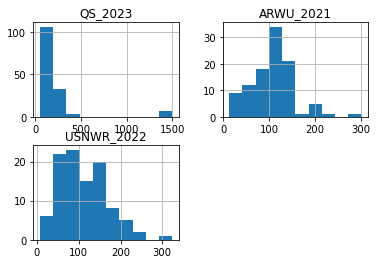

In [ ]:
comp_df.nlargest(150,'QS_2023').hist()

### Conclusion

In this project, I make you use of several python libraries (BeautifulSoup, pandas, re) to scrape the web and parse html data to convert it to a dataframe that was used for analysis.

I analyse the wikipedia top universities data and derived at some valuable insight which answer my curiosity about the countries with the most top-rank universities. This country is the United state while Havard University maintains the 1st position among the universities.

Note: The analysis was done with the ranking based on average across several ranking/publication organizations. These organizations makes use of different parameters to come about this list.

#### Limitations

Comprehensive data on parameters used were not provided which limit the scope of my analysis. The second question was not answered due to lack of available data for these institution average fee. 

---
Thanks

In [ ]:
df1_formed.to_csv('strap_data.csv')